# Tutorial: Toy Biorefinery Example

*All cells executed on tsv-to-csv branch, 4/5/2022*

In [1]:
import os
import sys
sys.path.insert(1, os.path.abspath("../../src"))
import numpy             as np
import matplotlib.pyplot as pl
import pandas            as pd
import seaborn           as sb
import tyche             as ty

## Design the technology model.

### Technology name.

Choose a unique name for the technology being modeled: **Biorefinery v1**

Also choose a unique name for the default, reference, or base-case scenario: **Bioreference**

### Dimensions and indices.

Decide which quantities will be tracked as indices in the model, and settle on their units of measurment and default values:
1.  Types of capital costs
    * Preprocessing
    * Fermentation
    * Conversion
    * Separations
    * Utilities
2.  Types of fixed cost
    * Rent
    * Insurance
3.  Inputs to the process
    * Feedstock
    * Natural gas
4.  Outputs from the process
    * Biofuel
5.  Metrics
    * Jobs (person-hours/gal biofuel)
    * Fossil GHG (kg CO2-eq/gal biofuel)
    * Total GHG (kg CO2-eq/gal biofuel)
    * MFSP (USD/gal biofuel) - minimum fuel selling price
6.  Parameters
    * Fossil GHG (kg CO2-eq/year)
    * Biogenic GHG (kg CO2-eq/year)
    * Employment (person-hours/year)
    * Preprocessing Capital Cost (USD/biorefinery)
    * Fermentation Capital Cost (USD/biorefinery)
    * Conversion Capital Cost (USD/biorefinery)
    * Separations Capital Cost (USD/biorefinery)
    * Utilities Capital Cost (USD/biorefinery)
    * Rent (USD/year)
    * Insurance (USD/year)
    * Original Scale (unitless)
    * Scaling Factor (unitless)
    * Ideal Biofuel Yield (gal/metric ton)
    * Discount Rate (unitless)
    * Depreciation Period (year)
    * Depreciation Period Utilities (year)
    * Income Tax Rate (unitless)


Note that in each category, the numeric indices for each item are numbered with integers starting from zero.

See the [model](https://tyche.live/doc-src/formulation.html) and [database](https://tyche.live/doc-src/database.html) documentation for more details.

### Create the `indices` table.

Check to see that the data file reads correctly:

In [2]:
my_designs = ty.Designs("data/biorefinery_v1/")
my_designs.indices.reset_index("Index").sort_values(["Type", "Offset"])

Index  Offset                 Description  \
Technology     Type                                                         
Biorefinery v1 Capital  Preprocessing       0  process area capital costs   
               Capital   Fermentation       1  process area capital costs   
               Capital     Conversion       2  process area capital costs   
               Capital    Separations       3  process area capital costs   
               Capital      Utilities       4  process area capital costs   
               Fixed             Rent       0                               
               Fixed        Insurance       1                               
               Input        Feedstock       0                               
               Input      Natural Gas       1                               
               Metric            Jobs       0    person-hours/gal biofuel   
               Metric      Fossil GHG       1       kg CO2-eq/gal biofuel   
               Metric       Total GHG       2       kg CO2-eq/gal biofuel   
               Metric            MFSP       3             USD/gal biofuel   
               Output         Biofuel       0                               

                                             Notes  
Technology     Type                                 
Biorefinery v1 Capital                              
               Capital                              
               Capital                              
               Capital                              
               Capital                              
               Fixed                                
               Fixed                                
               Input                                
               Input                                
               Metric                               
               Metric                               
               Metric                               
               Metric   minimum fuel selling price  
               Output

### Create the `results` table.

Check to see that the data file reads correctly:

In [3]:
my_designs.results

Units  \
Technology     Variable Index                                  
Biorefinery v1 Cost     Cost                        USD/year   
               Metric   Fossil GHG     kg CO2-eq/gal biofuel   
                        Jobs        person-hours/gal biofuel   
                        MFSP                 USD/gal biofuel   
                        Total GHG      kg CO2-eq/gal biofuel   
               Output   Biofuel                     gal/year   

                                                                         Notes  
Technology     Variable Index                                                   
Biorefinery v1 Cost     Cost                                                    
               Metric   Fossil GHG                                              
                        Jobs                                                    
                        MFSP                        minimum fuel selling price  
                        Total GHG                                               
               Output   Biofuel     average over expected biorefinery lifetime

### Create the `designs` table.

Check to see that the data file reads correctly:

In [4]:
my_designs.designs.reset_index(["Variable", "Index"]).sort_values(["Variable", "Index"])

Variable        Index   Value            Units  \
Technology     Scenario                                                         
Biorefinery v1 Bioreference       Input    Feedstock  771750  metric ton/year   
               Conversion 0       Input    Feedstock  771750  metric ton/year   
               Conversion 1       Input    Feedstock  771750  metric ton/year   
               Conversion 2       Input    Feedstock  771750  metric ton/year   
               Fermentation 0     Input    Feedstock  771750  metric ton/year   
...                                 ...          ...     ...              ...   
               Preprocessing 1    Scale  Biorefinery       1         unitless   
               Preprocessing 2    Scale  Biorefinery       1         unitless   
               Separations 0      Scale  Biorefinery       1         unitless   
               Separations 1      Scale  Biorefinery       1         unitless   
               Separations 2      Scale  Biorefinery       1         unitless   

                                                              Notes  
Technology     Scenario                                              
Biorefinery v1 Bioreference     per one year of expected operations  
               Conversion 0     per one year of expected operations  
               Conversion 1     per one year of expected operations  
               Conversion 2     per one year of expected operations  
               Fermentation 0   per one year of expected operations  
...                                                             ...  
               Preprocessing 1                                       
               Preprocessing 2                                       
               Separations 0                                         
               Separations 1                                         
               Separations 2                                         

[182 rows x 5 columns]

### Create the `parameters` table.

Check to see that the data file reads correctly:

In [5]:
my_designs.parameters.reset_index("Parameter").sort_values("Scenario")

Parameter  Offset        Value  \
Technology     Scenario                                                       
Biorefinery v1 Bioreference               Biogenic GHG       1    115762500   
               Bioreference     Utilities Capital Cost       7      1250000   
               Bioreference   Separations Capital Cost       6     50000000   
               Bioreference             Scaling Factor      11          0.6   
               Bioreference                       Rent       8      1000000   
...                                                ...     ...          ...   
               Separations 2   Conversion Capital Cost       5    100000000   
               Separations 2              Biogenic GHG       1    115762500   
               Separations 2  Separations Capital Cost       6     45750000   
               Separations 2                Fossil GHG       0  163201972.5   
               Separations 2    Utilities Capital Cost       7      1250000   

                                        Units Notes  
Technology     Scenario                              
Biorefinery v1 Bioreference    kg CO2-eq/year        
               Bioreference   USD/biorefinery        
               Bioreference   USD/biorefinery        
               Bioreference          unitless        
               Bioreference          USD/year        
...                                       ...   ...  
               Separations 2  USD/biorefinery        
               Separations 2   kg CO2-eq/year        
               Separations 2  USD/biorefinery        
               Separations 2   kg CO2-eq/year        
               Separations 2  USD/biorefinery        

[221 rows x 5 columns]

## Implement the technology model.

The implementation of a technology model consists of a capital cost function, a fixed cost function, a production function, and a metrics function.

See the [model](https://tyche.live/doc-src/formulation.html) documentation for more details.

The [src/technology/](../src/technology/) folder has examples of several technology models.

#### Capital cost function.

The capital cost function takes the scale of the operations and the array of technology parameters as arguments and it returns the capital costs for the technology.

In [6]:
def capital_cost(scale, parameter):
    """
    Capital cost function.

    Parameters
    ----------
    scale : float
      The scale of operation.
    parameter : array
      The technological parameterization.

    Returns
    -------
    @TODO update docstring
    Total capital cost for one biorefinery (USD/biorefinery)
    """
    # "original" biorefinery scale
    o_scale = parameter[10]

    # scaling factor for equipment costs
    scale_factor = parameter[11]

    pre = parameter[3] * (scale / o_scale) ** scale_factor
    fer = parameter[4] * (scale / o_scale) ** scale_factor
    con = parameter[5] * (scale / o_scale) ** scale_factor
    sep = parameter[6] * (scale / o_scale) ** scale_factor
    utl = parameter[7] * (scale / o_scale) ** scale_factor

    return np.stack([pre, fer, con, sep, utl])

Implement the capital cost function for your technology in the file [tutorial/my_technology.py](./).

#### Fixed cost function.

The fixed cost function takes the scale of the operations and the array of technology parameters as arguments and it returns the fixed costs for the technology.

In [7]:
def fixed_cost(scale, parameter):
    """
    Fixed cost function.

    Parameters
    ----------
    scale : float [Unused]
      The scale of operation.
    parameter : array
      The technological parameterization.

    Returns
    -------
    total fixed costs for one biorefinery (USD/year)
    """
    o_scale = parameter[10]

    rnt = parameter[8] * (scale / o_scale)
    ins = parameter[9] * (scale / o_scale)

    return np.stack([rnt, ins])

Implement the fixed cost function for your technology in the file [tutorial/my_technology.py](./).

#### Production function.

The production function takes the scale of the operations, the capital costs, the lifetime, the fixed costs, and the array of technology parameters as arguments and it returns the production (outputs) for the technology.

In [8]:
def production(scale, capital, lifetime, fixed, input, parameter):
    """
    Production function.

    Parameters
    ----------
    scale : float
      The scale of operation.
    capital : array
      Capital costs.
    lifetime : float
      Technology lifetime.
    fixed : array
      Fixed costs.
    input : array
      Input quantities.
    parameter : array
      The technological parameterization.

    Returns
    -------
    output_raw
        Ideal/theoretical production of each technology output: biofuel at
        gals/year
    """

    theor_yield = parameter[12]
    feedstock = input[0] * scale

    # theoretical biofuel yield w/out any efficiency losses
    output_raw = theor_yield * feedstock

    return np.stack([output_raw])

Implement the production function for your technology in the file [tutorial/my_technology.py](./).

#### Metric function.

The metric function takes information on costs, inputs, outputs, and parameters and it returns the metrics for the technology.

In [9]:
def metrics(scale, capital, lifetime, fixed, input_raw,
            input, input_price, output_raw, output, cost, parameter):
    """
    Metrics function.

    Parameters
    ----------
    scale : float
      The scale of operation. Unitless
    capital : array
      Capital costs. Units: USD/biorefinery
    lifetime : float
      Technology lifetime. Units: year
    fixed : array
      Fixed costs. Units: USD/year
    input_raw : array
      Raw input quantities (before losses). Units: metric ton feedstock/year
    input : array
      Input quantities. Units: metric ton feedstock/year
    input_price : array
        Array of input prices. Various units.
    output_raw : array
      Raw output quantities (before losses). Units: gal biofuel/year
    output : array
      Output quantities. Units: gal biofuel/year
    cost : array
      Costs.
    parameter : array
      The technological parameterization. Units vary; given in comments below
    """

    # annual fossil GHG emissions, Units: kg CO2-eq/year
    ghg_foss_ann = parameter[0]
    # annual biogenic GHG emissions, Units: kg CO2-eq/year
    ghg_bio_ann  = parameter[1]
    # Annual person-hours required, Units: person-hours/year
    emp_ann      = parameter[2]
    # Preprocessing capital cost, Units: USD
    pre_cap      = parameter[3]
    # Fermentation capital cost, Units: USD
    fer_cap      = parameter[4]
    # Conversion capital cost, Units: USD
    con_cap      = parameter[5]
    # Separations capital cost, Units: USD
    sep_cap      = parameter[6]
    # Utilities capital cost, Units: USD
    utl_cap      = parameter[7]
    # Annual rent, Units: USD/year
    rnt_ann      = parameter[8]
    # Annual insurance, Units: USD/year
    ins_ann      = parameter[9]
    # Discount rate, Unitless
    dr           = parameter[13]
    # Depreciation period for all equipment except utilities, Units: years
    dp           = parameter[14]
    # Depreciation period for utilities, Units: years
    dpu          = parameter[15]
    # Income tax rate, Units: years
    tr           = parameter[16]
    # equipment lifetime
    els          = lifetime[0]

    # JOBS: person-hours/gal biofuel
    # parameter[2] units: person-hours/year
    # output units: gal biofuel/year
    emp = emp_ann / output

    # FOSSIL GHG: kg CO2-eq/gal biofuel
    # parameter[0] units: kg CO2-eq/year
    # output units: gal biofuel/year
    ghg_foss = ghg_foss_ann / output

    # TOTAL GHG: kg CO2-eq/gal biofuel
    # parameter[0] and parameter[1] units: kg CO2-eq/year
    # output units: gal biofuel/year
    ghg_tot = (ghg_foss_ann + ghg_bio_ann) / output

    # MINIMUM FUEL SELLING PRICE: USD/gal biofuel
    # total project investment, Units: USD
    # sum of all capital costs
    tpi = pre_cap + fer_cap + con_cap + sep_cap + utl_cap

    # depreciation costs, units: USD/year
    dc = (pre_cap + fer_cap + con_cap + sep_cap) / dp + utl_cap / dpu

    # operating costs, units: USD/year
    oc = input_raw[0] * input_price[0] + input_raw[1] * input_price[1] + rnt_ann + ins_ann

    # tpi discount factor, Units: unitless
    df_tpi = (dr * (1 + dr) ** els) / ((1 + dr) ** els - 1)

    # total revenue from biofuel sales, Units: USD/year
    br = ((1 - tr) * oc - tr * dc + df_tpi * tpi) / (1 - tr)

    # MFSP, Units: USD/gal biofuel
    mfsp = br / output
    
    return np.stack([emp, ghg_foss, ghg_tot, mfsp])

Implement the metrics function for your technology in the file [tutorial/my_technology.py](./).

### Checking math in the metrics function

In [10]:
parameter_check = np.array([10.0, 10.0, 10.0,              # fossil GHG, bio GHG, employment
                            10.0, 10.0, 10.0, 10.0, 10.0,  # capital costs
                            5.0, 5.0,                      # fixed costs
                            1.0, 1.0,                      # original scale, scaling factor
                            1.0,                           # ideal biofuel yield
                            0.1,                           # discount rate
                            10.0, 10.0,                    # depreciation periods
                            0.1])                          # income tax rate
output_check = 10.0
input_raw_check = np.array([10.0, 10.0])
input_price_check=  np.array([1.0, 1.0])

metrics(scale = 1.0,
        capital = np.array([10.0, 10.0, 10.0, 10.0, 10.0]),
        lifetime = np.array([10.0, 10.0, 10.0, 10.0, 10.0]),
        fixed = np.array([5.0, 5.0]),
        input_raw = input_raw_check,
        input = input_raw_check,
        input_price = input_price_check,
        output_raw = output_check,
        output = output_check,
        cost = np.array([1.0]),
        parameter = parameter_check)

array([1.        , 1.        , 2.        , 3.84858553])

### Create the `functions` table.

Check to see that the data file reads correctly:

In [11]:
my_designs.functions

,Style,Module,Capital,Fixed,Production,Metrics,Notes
Technology,,,,,,,
Biorefinery v1,numpy,biorefinery_v1,capital_cost,fixed_cost,production,metrics,


Check to see that the functions compile without errors.

In [12]:
my_designs.compile()

## Create investment for reference case.

### Create the `tranches` table.

Check to see that the data file reads correctly:

In [13]:
my_investments = ty.Investments("data/biorefinery_v1")
my_investments.tranches

Amount Notes
Category      Tranche                 Scenario                        
Conversion    Conversion 0            Conversion 0      800000.0      
              Conversion 1            Conversion 1     2000000.0      
              Conversion 2            Conversion 2     2250000.0      
              Conversion Reference    Bioreference           0.0      
Fermentation  Fermentation 0          Fermentation 0    250000.0      
              Fermentation 1          Fermentation 1    400000.0      
              Fermentation 2          Fermentation 2    500000.0      
              Fermentation Reference  Bioreference           0.0      
Preprocessing Preprocessing 0         Preprocessing 0   500000.0      
              Preprocessing 1         Preprocessing 1  1500000.0      
              Preprocessing 2         Preprocessing 2  1750000.0      
              Preprocessing Reference Bioreference           0.0      
Separations   Separations 0           Separations 0     500000.0      
              Separations 1           Separations 1    2000000.0      
              Separations 2           Separations 2    4000000.0      
              Separations Reference   Bioreference           0.0

### Create the `investments` table.

Check to see that the data file reads correctly:

In [14]:
my_investments = ty.Investments("data/biorefinery_v1")
my_investments.investments

Notes
Investment   Category      Tranche                      
High R&D     Conversion    Conversion 2                 
             Fermentation  Fermentation 2               
             Preprocessing Preprocessing 2              
             Separations   Separations 2                
Low R&D      Conversion    Conversion 0                 
             Fermentation  Fermentation 0               
             Preprocessing Preprocessing 0              
             Separations   Separations 0                
Moderate R&D Conversion    Conversion 1                 
             Fermentation  Fermentation 1               
             Preprocessing Preprocessing 1              
             Separations   Separations 1                
No R&D       Conversion    Conversion Reference         
             Fermentation  Fermentation Reference       
             Preprocessing Preprocessing Reference      
             Separations   Separations Reference

## Test the optimization feasibility.

In [15]:
my_designs = ty.Designs("data/biorefinery_v1")
my_investments = ty.Investments("data/biorefinery_v1")
my_designs.compile()
investment_results = my_investments.evaluate_investments(my_designs, sample_count=50)
tranche_results = my_investments.evaluate_tranches(my_designs, sample_count=50)

/Users/tghosh/OneDrive - NREL/work_NREL/tyche/src/tyche/Investments.py:118: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  amounts = self.investments.drop(
/Users/tghosh/OneDrive - NREL/work_NREL/tyche/src/tyche/Designs.py:373: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  costs   = costs.append(  result.cost  )
/Users/tghosh/OneDrive - NREL/work_NREL/tyche/src/tyche/Designs.py:374: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outputs = outputs.append(result.output)
/Users/tghosh/OneDrive - NREL/work_NREL/tyche/src/tyche/Designs.py:375: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.

Evaluating Biorefinery v1
Evaluating Biorefinery v1


/Users/tghosh/OneDrive - NREL/work_NREL/tyche/src/tyche/Designs.py:375: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append(result.metric)
/Users/tghosh/OneDrive - NREL/work_NREL/tyche/src/tyche/Designs.py:388: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return organize("Cost", costs).append(
/Users/tghosh/OneDrive - NREL/work_NREL/tyche/src/tyche/Designs.py:388: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return organize("Cost", costs).append(
/Users/tghosh/OneDrive - NREL/work_NREL/tyche/src/tyche/Investments.py:96: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.grou

In [16]:
evaluator = ty.Evaluator(my_investments.tranches, tranche_results.summary)

In [17]:
_wide = evaluator.evaluate_corners_wide(np.mean).reset_index()

In [18]:
investment_results.metrics

Value  \
Investment Category    Tranche              Scenario      Sample Technology     Index                  
No R&D     Conversion  Conversion Reference Bioreference  1      Biorefinery v1 Fossil GHG  3.322701   
                                                                                Jobs        0.002067   
                                                                                MFSP        2.800958   
                                                                                Total GHG   5.696058   
                                                          2      Biorefinery v1 Fossil GHG  3.322701   
...                                                                                              ...   
High R&D   Separations Separations 2        Separations 2 49     Biorefinery v1 Total GHG   3.201120   
                                                          50     Biorefinery v1 Fossil GHG  2.324157   
                                                                                Jobs        0.001914   
                                                                                MFSP        1.916548   
                                                                                Total GHG   3.972728   

                                                                                                               Units  
Investment Category    Tranche              Scenario      Sample Technology     Index                                 
No R&D     Conversion  Conversion Reference Bioreference  1      Biorefinery v1 Fossil GHG     kg CO2-eq/gal biofuel  
                                                                                Jobs        person-hours/gal biofuel  
                                                                                MFSP                 USD/gal biofuel  
                                                                                Total GHG      kg CO2-eq/gal biofuel  
                                                          2      Biorefinery v1 Fossil GHG     kg CO2-eq/gal biofuel  
...                                                                                                              ...  
High R&D   Separations Separations 2        Separations 2 49     Biorefinery v1 Total GHG      kg CO2-eq/gal biofuel  
                                                          50     Biorefinery v1 Fossil GHG     kg CO2-eq/gal biofuel  
                                                                                Jobs        person-hours/gal biofuel  
                                                                                MFSP                 USD/gal biofuel  
                                                                                Total GHG      kg CO2-eq/gal biofuel  

[3200 rows x 2 columns]

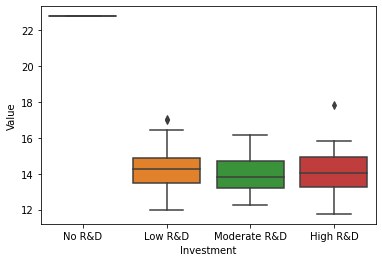

In [19]:
g = sb.boxplot(
    x="Investment",
    y="Value",
    data=investment_results.metrics.xs(
        "Total GHG",
        level="Index"
    ).groupby(["Investment", "Sample"]).aggregate(np.sum).reset_index()[["Investment", "Value"]],
    order=[
        "No R&D"   ,
        "Low R&D"  ,
        "Moderate R&D",
        "High R&D"  ,
    ]
)

Now, use the optimization methods to explore the greatest potential reduction in MFSP under a variety of budget and metric constraints.

In [20]:
optimizer = ty.EpsilonConstraintOptimizer(evaluator)

The `optimum_metrics` method does not need to be called, but it is useful to get an idea of the best possible metric values. Use the `sense` parameter (Dictionary format) to specify whether each metric should be minimized or maximized. If no `sense` is provided, all metrics are maximized.

Note that the solutions provided by `optimum_metrics` are not likely to be the same as those found through the optimization methods. Applying budget constraints and/or metric constraints will change the optimal objective function value.

In [21]:
q = optimizer.optimum_metrics(verbose = 0,
                             sense = {'Fossil GHG': 'min',
                                     'Jobs': 'max',
                                     'MFSP': 'min',
                                     'Total GHG': 'min'})
q

Fossil GHG     8.089613
Jobs           0.008266
MFSP           6.600170
Total GHG     13.772886
Name: Value, dtype: float64

Now use `opt_slsqp` to see what the lowest possible MFSP is with an budget of $3e8 and no constraints on where the budget is spent or on other metrics.

In [22]:
slsqp_result = optimizer.opt_slsqp(
    "MFSP"                                                       ,
    sense = 'min'                                                ,
    total_amount = 3e8                                           ,
    verbose      = 0                                             ,
)
slsqp_result[1]

'Optimization terminated successfully'

In [23]:
slsqp_result[3]

Index
Fossil GHG     8.089613
Jobs           0.006156
MFSP            6.60017
Total GHG     13.772886
Name: Value, dtype: object

In [24]:
slsqp_result[2]

Category
Conversion       2250000.0
Fermentation      500000.0
Preprocessing    1750000.0
Separations      4000000.0
Name: Amount, dtype: float64

In [25]:
diffev_result = optimizer.opt_diffev(
    "MFSP"                                                       ,
    sense = 'min'                                                ,
    total_amount = 3e8                                           ,
    verbose      = 0                                             ,
)
diffev_result[1]

/Users/tghosh/miniconda3/envs/tyche/lib/python3.8/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


'Optimization terminated successfully.'

In [26]:
diffev_result[3]

Index
Fossil GHG     8.090774
Jobs           0.006155
MFSP           6.600809
Total GHG     13.774393
Name: Value, dtype: float64

In [27]:
diffev_result[2]

Category
Conversion       2.249248e+06
Fermentation     4.998871e+05
Preprocessing    1.749343e+06
Separations      3.993036e+06
Name: Amount, dtype: float64

The SHGO optimizer is extremely slow. The calls are provided here for reference and should run without error, but will take 15+ minutes to complete.

In [28]:
#shgo_result = optimizer.opt_shgo(
#    "MFSP"                                                       ,
#    sense = 'min'                                                ,
#    total_amount = 3e8                                           ,
#    verbose      = 0                                             ,
#)
#shgo_result[1]

In [29]:
#shgo_result[3]

In [30]:
#shgo_result[2]

We may also be interested in trade-offs between metrics. Now we can use `opt_slsqp` with the `eps_metric` parameter to again minimize MFSP, this time under both a budget constraint and an upper bound on the Total GHG emissions metric. From the `optimum_metric` results above, we know that the lowest possible value of Total GHG emissions is 13.66. We can use this information to decide on a reasonable upper bound for the constraint.

In [31]:
slsqp_result = optimizer.opt_slsqp(
    "MFSP"                                                        ,
    sense = 'min'                                                 ,
    eps_metric = {'Total GHG': {'limit': 13.8, 'sense': 'upper'}} ,
    total_amount = 3e8                                            ,
    verbose      = 0                                              ,
)
slsqp_result[1]

'Positive directional derivative for linesearch'

An Iteration limit reached message means that the optimizer was unable to converge to an optimal solution within the specified maximum number of iterations, which defaults to 50. We can increase the iteration limit and re-solve to see if an optimal solution can be found.

In [32]:
slsqp_result = optimizer.opt_slsqp(
    "MFSP"                                                        ,
    sense = 'min'                                                 ,
    eps_metric = {'Total GHG': {'limit': 13.8, 'sense': 'upper'}} ,
    total_amount = 3e8                                            ,
    maxiter = 200,
    verbose      = 0                                              ,
)
slsqp_result[1]

'Positive directional derivative for linesearch'

There is still no optimal solution, although if we look at the non-converged solution, we do see some improvement in Total GHG emissions and in MFSP.

In [33]:
slsqp_result[3]

Index
Fossil GHG     8.089613
Jobs           0.006156
MFSP            6.60017
Total GHG     13.772886
Name: Value, dtype: object

In [34]:
slsqp_result[2]

Category
Conversion       2.250000e+06
Fermentation     5.000000e+05
Preprocessing    1.750000e+06
Separations      4.000000e+06
Name: Amount, dtype: float64

Another option if an optimal solution is not quickly found is to alter the budget constraint, to see if additional funds will allow the metric constraint to be met.

In [35]:
slsqp_result = optimizer.opt_slsqp(
    "MFSP"                                                        ,
    sense = 'min'                                                 ,
    eps_metric = {'Total GHG': {'limit': 13.8, 'sense': 'upper'}} ,
    total_amount = 5e8                                            ,
    maxiter = 200,
    verbose      = 0                                              ,
)
slsqp_result[1]

'Positive directional derivative for linesearch'

In [36]:
slsqp_result[3]

Index
Fossil GHG     8.089613
Jobs           0.006156
MFSP            6.60017
Total GHG     13.772886
Name: Value, dtype: object

In [37]:
slsqp_result[2]

Category
Conversion       2.250000e+06
Fermentation     5.000000e+05
Preprocessing    1.750000e+06
Separations      4.000000e+06
Name: Amount, dtype: float64

In [38]:
diffev_eps_result = optimizer.opt_diffev(
    "MFSP"                                                        ,
    sense = 'min'                                                 ,
    eps_metric = {'Total GHG': {'limit': 13.8, 'sense': 'upper'}} ,
    total_amount = 3e8                                            ,
    verbose      = 0                                              ,
)
diffev_eps_result[1]

/Users/tghosh/miniconda3/envs/tyche/lib/python3.8/site-packages/scipy/optimize/_differentialevolution.py:898: UserWarning: differential evolution didn't find a solution satisfying the constraints, attempting to polish from the least infeasible solution
  warnings.warn("differential evolution didn't find a"
/Users/tghosh/miniconda3/envs/tyche/lib/python3.8/site-packages/scipy/optimize/_trustregion_constr/projections.py:181: UserWarning: Singular Jacobian matrix. Using SVD decomposition to perform the factorizations.
  warn('Singular Jacobian matrix. Using SVD decomposition to ' +
/Users/tghosh/miniconda3/envs/tyche/lib/python3.8/site-packages/scipy/optimize/_trustregion_constr/projections.py:181: UserWarning: Singular Jacobian matrix. Using SVD decomposition to perform the factorizations.
  warn('Singular Jacobian matrix. Using SVD decomposition to ' +
/Users/tghosh/miniconda3/envs/tyche/lib/python3.8/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad 

29.564738035202026

In [39]:
#shgo_eps_result = optimizer.opt_shgo(
#    "MFSP"                                                        ,
#    sense = 'min'                                                 ,
#    eps_metric = {'Total GHG': {'limit': 13.8, 'sense': 'upper'}} ,
#    total_amount = 3e8                                            ,
#    verbose      = 0                                              ,
#)
#shgo_eps_result[1]

In [40]:
pwlinear_result = optimizer.opt_milp(
    "MFSP",
    sense='min',
    total_amount = 3e8,
    verbose = 2
)

Getting and processing wide data at 0.0 s
Data processed at 0.6 s
Building MIP model at 0.6 s
Creating 256 lambda variables at 0.7 s
Creating 32640 binary variables and constraints at 0.7 s
Creating total budget constraint at 1.5 s
Creating category budget constraints at 1.6 s
Defining metric constraints at 1.6 s
Defining lambda convexity constraints at 1.6 s
Defining binary convexity constraints at 1.6 s
Defining objective function at 4.4 s
Saving model at 4.4 s
Optimizing at 4.5 s
Welcome to the CBC MILP Solver 
Version: Trunk
Build Date: Nov 15 2020 

Starting solution of the Linear programming relaxation problem using Dual Simplex

Coin0506I Presolve 32647 (0) rows, 32896 (0) columns and 131839 (0) elements
Clp0014I Perturbing problem by 0.001% of 10.350613 - largest nonzero change 0.00018936886 ( 0.0080396379%) - largest zero change 5.5173214e-05
Clp0006I 1755  Obj 6.6006115 Primal inf 1.0448214 (1)
Clp0006I 3253  Obj 6.6006141 Primal inf 0.93128737 (1)
Clp0006I 4657  Obj 6.600615

/Users/tghosh/OneDrive - NREL/work_NREL/tyche/src/tyche/EpsilonConstraints.py:1050: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  y = pd.Series(None, name="Value",


In [41]:
pwlinear_result.exit_message

<OptimizationStatus.OPTIMAL: 0>

In [42]:
pwlinear_result.metrics

Fossil GHG     8.089613
Jobs           0.006156
MFSP           6.600170
Total GHG     13.772886
Name: Value, dtype: float64

In [43]:
pwlinear_result.amounts

Category
Conversion       2250000.0
Fermentation      500000.0
Preprocessing    1750000.0
Separations      4000000.0
Name: Amount, dtype: float64

In [44]:
pwlinear_result.solve_time

19.161235094070435

In [45]:
pwlinear_eps_result = optimizer.opt_milp(
    "MFSP",
    sense='min',
    eps_metric = {'Total GHG': {'limit': 14.0, 'sense': 'upper'}} ,
    total_amount = 3e8,
    verbose = 2
)

Getting and processing wide data at 0.0 s
Data processed at 0.6 s
Building MIP model at 0.6 s
Creating 256 lambda variables at 0.6 s
Creating 32640 binary variables and constraints at 0.6 s
Creating total budget constraint at 1.5 s
Creating category budget constraints at 1.5 s
Defining metric constraints at 1.5 s
Defining lambda convexity constraints at 1.5 s
Defining binary convexity constraints at 1.5 s
Defining objective function at 4.4 s
Saving model at 4.5 s
Optimizing at 4.5 s
Cgl0005I 1 SOS with 32640 members
Cgl0004I processed model has 32647 rows, 32896 columns (32640 integer (32640 of which binary)) and 131839 elements
Coin3009W Conflict graph built in 2.780 seconds, density: 24.613%
Cgl0015I Clique Strengthening extended 0 cliques, 0 were dominated
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of 6.60017
Cbc0038I Relaxing continuous gives 6.60017
Cbc0038I Before mini branch and bound, 32640 integers at bound fixed and 256 continuous
Cbc0038I

In [46]:
pwlinear_eps_result.exit_message

<OptimizationStatus.INFEASIBLE: 1>